In [1]:
import timeit

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
n = 10000

In [4]:
def test_binaryop(n):
    return["%d" % i for i in range(n)]

def test_format(n):
    return ["{}".format(i) for i in range(n)]


In [5]:
%timeit test_format(n)
%timeit test_binaryop(n)

3.09 ms ± 93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2 ms ± 53.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
funcs = ['test_format', "test_binaryop"]

order_n = [10**n for n in range(1,6)]
times_n = {f: [] for f in funcs}

for n in order_n:
    for f in funcs:
        value = min(timeit.Timer("%s(n)" %f,
                                 "from __main__ import %s, n" % f).repeat(repeat=3, number=1000))
        times_n[f].append(value)

In [11]:
times_n

{'test_format': [0.0037567439721897244,
  0.029485602979548275,
  0.2893256830284372,
  2.9192726359469816,
  31.399699546047486],
 'test_binaryop': [0.0024144049966707826,
  0.018692014971747994,
  0.18687997700180858,
  1.9002421430777758,
  20.921757807955146]}

Text(0, 0.5, 'time per computaion in seconds')

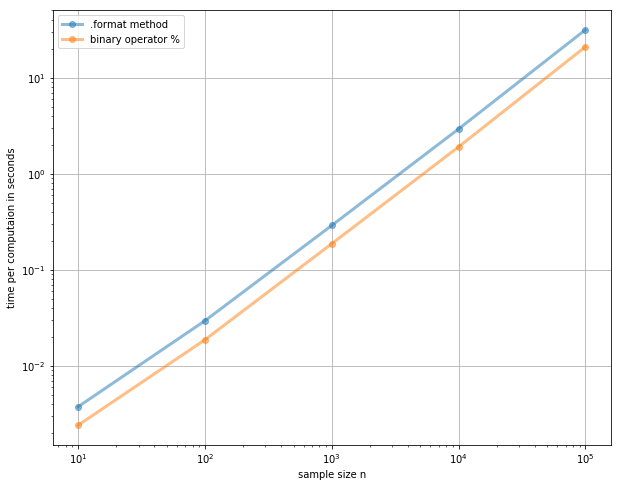

In [16]:
label = [("test_format", ".format method"), ("test_binaryop", "binary operator %")]

fig = plt.figure(figsize=(10,8))
for lb in label:
    plt.plot(order_n, times_n[lb[0]], alpha=0.5, label=lb[1], marker='o', lw=3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel('sample size n')
plt.ylabel('time per computaion in seconds')